In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_excel('clean excel.xlsx')
energy = df['Energy Density (J/mm3)'].to_numpy()
density = df['Part Density (%)'].to_numpy()
X = np.transpose(np.array([df['Scan Speed'], df['Laser Power '], df['Hatch Spacing (um)'], df['Layer Thickness (um)']]))
print(len(X),len(energy),len(density))

26 26 26


In [41]:
target = density
reg = LinearRegression().fit(X, target)
print(reg.score(X, target))
print(reg.coef_, reg.intercept_)

0.42298807963431384
[-0.00334464  0.03991249 -0.04753949  0.1300641 ] 91.44455404068326


In [24]:
checkpoint_filepath = 'weights_checkpoints/2_0'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [37]:
target = density
model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, input_shape=(4,), activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X[:-2], target[:-2], epochs=100,
             validation_data=(X[-2:], target[-2:]),
             callbacks=[model_checkpoint_callback])

Epoch 1/100
1/1 [==============================] - 0s 244ms/step - loss: 16173.1592 - val_loss: 9550.8555
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 9820.4854 - val_loss: 5278.1006
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 5214.6177 - val_loss: 2409.6501
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 2250.4846 - val_loss: 737.7260
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 762.0296 - val_loss: 109.7154
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 424.1081 - val_loss: 199.0607
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 816.8999 - val_loss: 594.2518
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 1504.6476 - val_loss: 973.8359
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 2106.1438 - val_loss: 1183.3430
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - los

In [38]:
model.load_weights(checkpoint_filepath)
print('Prediction:',model.predict(X[-6:]))
print('GT:',target[-6:])

Prediction: [[ 90.005455]
 [ 93.29315 ]
 [102.29036 ]
 [ 98.75225 ]
 [100.59254 ]
 [ 91.8301  ]]
GT: [91.976 99.982 99.792 99.956 99.852 92.47 ]


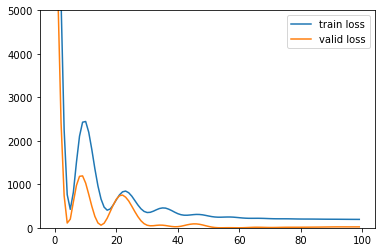

In [39]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='valid loss')
plt.legend()
plt.ylim(0, 5000) 
plt.show()

In [40]:
print(target)

[99.908  96.268  99.625  92.7525 91.456  99.952  99.596  78.888  99.98
 99.744  99.99   99.97   87.958  99.836  97.406  99.698  93.63   97.318
 99.836  99.698  91.976  99.982  99.792  99.956  99.852  92.47  ]


In [5]:
# X = np.array([[230,1200,90], [280,1200,90], [255,1719.6,90], 
#               [255,1373.22,122.66],[180,1200,90],[205,680.4,90],
#               [205,1026.78,57.34],[255,680.4,90],[255,1026.78,57.34],
#               [205,1719.6,90],[230,1546.44,57.34],[205,1373.22,122.66],
#               [230,853.56,122.66]])

# y = np.array([0.186,0.436,1.345,3.477,2.935,0.011,0.004,0.16,0.039,10.948,0.062,4.452,0.279])

In [38]:
# Linear Regression SKLEARN
df = pd.read_excel('Book1.xlsx')
x = np.array([np.array(df['P (W)']),np.array(df['v (mm/s)']),
             np.array(df['h (um)']),np.array(df['P2']),np.array(df['V2']),
             np.array(df['H2']),np.array(df['PV']),np.array(df['PH']),
             np.array(df['VH']),
             ]).transpose()
reg = LinearRegression().fit(x, y)
print(reg.score(x, y))
print(reg.coef_, reg.intercept_)

0.8953235804119074
[-1.50924198e-01  1.35299387e-02 -3.43458560e-01  5.99800000e-04
  9.46398115e-06  3.57790726e-04 -1.87682833e-04  6.86173311e-04
  1.35488869e-04] 24.282128377570633


In [18]:
y

array([1.8600e-01, 4.3600e-01, 1.3450e+00, 3.4770e+00, 2.9350e+00,
       1.1000e-02, 4.0000e-03, 1.6000e-01, 3.9000e-02, 1.0948e+01,
       6.2000e-02, 4.4520e+00, 2.7900e-01])